In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Hyperparameter tuning

First round hyperparameters to remove:
 - learning rates undershot pretty badly. Remove 1.e-05, 5e-05, 1e-04, 5e-4
 - among these, gcn_depth=3 is very bad, gcn_min=16 is bad, mlp_max=32 is bad

In [ ]:
target = "reps-toric-code-exp-v0/gnn_reps_toric_code_results.csv"
df = pd.read_csv(target)

In [22]:
df.head()


,epoch,train_loss,train_acc,val_loss,val_acc,vs_lookup,vs_minweight,lr,batch_size,gcn_depth,gcn_min,mlp_depth,mlp_max,beta
0,1810,0.040941,0.993298,0,0.984346,0.984346,0.984346,0.0001,256,5,64,3,128,1
1,520,0.044950,0.992985,0,0.986640,0.986640,0.986640,0.0010,256,3,64,3,64,1
2,1380,0.065005,0.988598,0,0.983994,0.983994,0.983994,0.0010,256,3,16,3,64,1
3,1340,0.069858,0.987595,0,0.984150,0.984150,0.984150,0.0005,256,3,16,3,64,1
4,1620,0.057213,0.990975,0,0.983399,0.983399,0.983399,0.0005,256,3,16,3,128,1


In [31]:
sorted(df["lr"].unique())

[1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.002]

[-3.      -2.69897]
[-3.05    -2.74897 -2.14897]


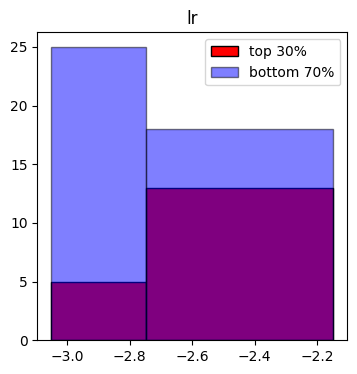

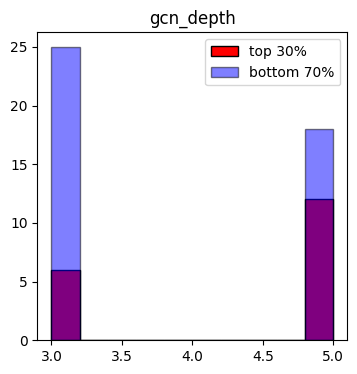

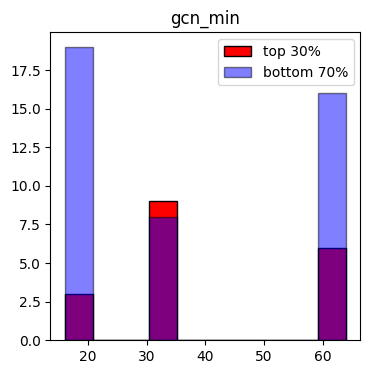

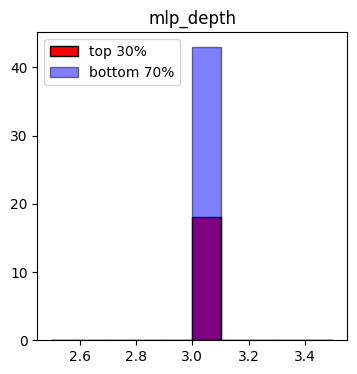

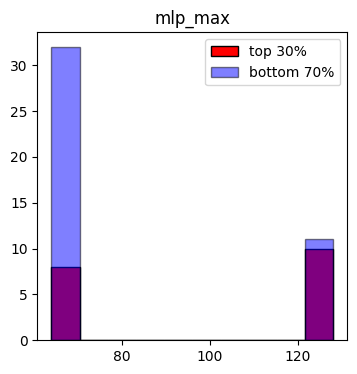

In [32]:
def compare_slice_by_column(df, column, slice_by, percentile=0.5):
    best_half = df[df[slice_by] > df[slice_by].quantile(percentile)]
    worst_half = df[df[slice_by] <= df[slice_by].quantile(percentile)]
    fig, ax = plt.subplots(figsize=(4, 4))
    best = best_half[column]
    worst = worst_half[column]
    if column == 'lr':
        # manually bin based on unique values of lr, in log axis
        best = np.log10(best)
        worst = np.log10(worst)
        bins = np.log10(np.unique(df[column]))
        bins = np.concatenate((bins, [bins[-1] + 0.1])) - 0.05
        bins[-1] += 0.5
        print(np.log10(np.unique(df[column])))
        print(bins)
    else:
        bins = 10
    cts, bins, _ = ax.hist(best, bins=bins, alpha=1, color='r', label='top {}%'.format(100 - int(percentile * 100)), edgecolor='black')
    ax.hist(worst, bins=bins, alpha=0.5, color='b', label='bottom {}%'.format(int(percentile * 100)), edgecolor='black')
    ax.legend()
    ax.set_title(column)

for column in ['lr', 'gcn_depth', 'gcn_min', 'mlp_depth', 'mlp_max']:
    compare_slice_by_column(df[df['lr'] >= 0.001], column, 'val_acc', percentile=0.7)

Text(0, 0.5, 'Validation Accuracy')

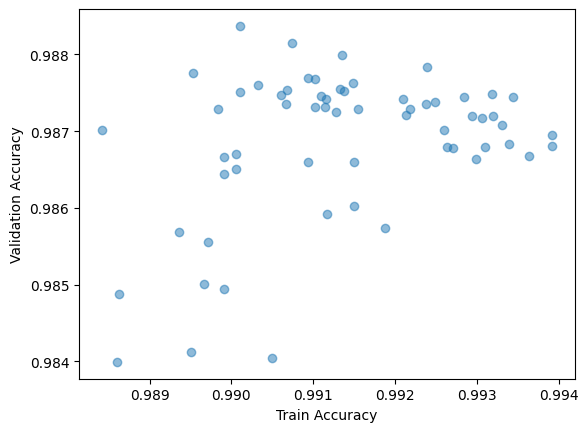

In [33]:
x = df[df['lr'] >= 0.001]["train_acc"]
y = df[df['lr'] >= 0.001]["val_acc"]
plt.scatter(x, y, alpha=0.5)
plt.xlabel("Train Accuracy")
plt.ylabel("Validation Accuracy")


array([[<Axes: title={'center': 'val_acc'}>]], dtype=object)

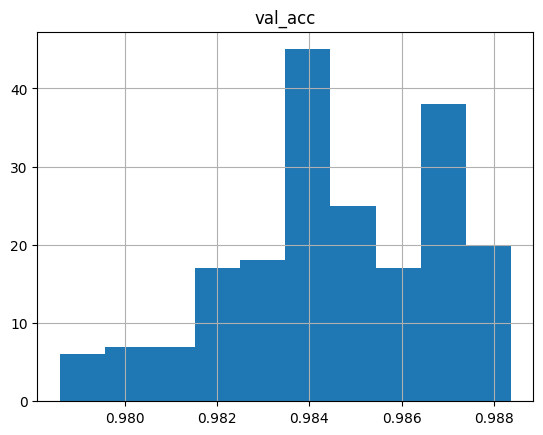

In [ ]:
df.hist("val_acc")